# Kernels

* Hasta ahora el SVM era capaz de encontrrar fornteras lineales en el espacio vectorial. Pero también podemos hacer extensiones a ese algortimo añadiendo otro tipo de restricciones no solo lineales como polinomiales, por ejemplo.
* De forma general las fornteras se puede definir en otro espacio vectorial, utilizando otra base, que nos separe mejor el conjunto de entrenamiento.

<img src="img/SVM_kernels_1.jpg" width="600">

<img src="img/SVM_kernels_2.jpg" width="600">

<img src="img/SVM_kernels_3.jpg" width="200">

## Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
#copiamos esta funcion de T8-3 SVM Model
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

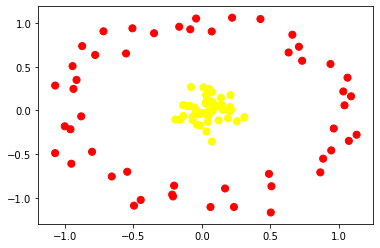

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

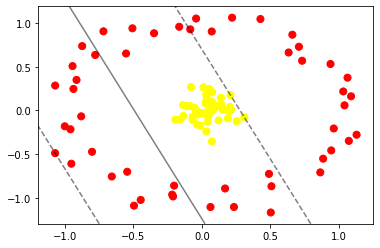

In [17]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

* **Vemos que con las rectas no se pueden separar este tipo de puntos.**

## 1ª Forma: Aumentando la dimesión para separar.

**Podríamos suponer que estamos en 3D y que los puntos rojos se encuentran por encima de los amarillos(si viesemos la gráfica desde arriba).** 

* Por ello podemos suponer que si usamos como separador una campana Gaussiana(e^-(x^2) centrada en 0). Los puntos amarillos sería la cúpula de la campana y los rojos las faldas.

In [18]:
r = np.exp(-(X**2).sum(1)) #la normalizamos diciendole que la suma de sus componentes sea 1(sum(1))

In [19]:
r

array([0.42110582, 0.95735293, 0.98843303, 0.99804858, 0.38028502,
       0.29261532, 0.26370364, 0.9883624 , 0.32874695, 0.97765391,
       0.99410764, 0.33191965, 0.98381661, 0.35531452, 0.39050465,
       0.33707866, 0.28032432, 0.97803815, 0.92865729, 0.48213614,
       0.95549786, 0.96058303, 0.33311854, 0.33767308, 0.25877511,
       0.37952356, 0.36479327, 0.99741615, 0.99782292, 0.98650617,
       0.39052519, 0.97769415, 0.98578073, 0.29764214, 0.90351063,
       0.93980036, 0.30613516, 0.43228154, 0.97083007, 0.99390291,
       0.45779398, 0.93283217, 0.42082313, 0.31712729, 0.99911111,
       0.96367238, 0.96475169, 0.28126407, 0.25021796, 0.38301065,
       0.99007269, 0.96069717, 0.92515248, 0.9523521 , 0.99645939,
       0.37947226, 0.24025421, 0.99295266, 0.31274177, 0.97279764,
       0.27864244, 0.98167287, 0.99039227, 0.36585401, 0.45544777,
       0.36768199, 0.28891816, 0.99771942, 0.92333739, 0.36526061,
       0.98990112, 0.9987134 , 0.94358747, 0.29586046, 0.96760

In [9]:
from mpl_toolkits import mplot3d

In [42]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r): 
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim) #para poner la vista inicial de la gráfica3D 
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [43]:
from ipywidgets import interact, fixed

In [47]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r)) #al poner fixed, colocamos como fijos

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.08498802,  0.92609296],
       [ 0.20495077,  0.03972843],
       [ 0.06037713,  0.08938115],
       [-0.02083714, -0.03897615],
       [-0.9595489 , -0.21470945],
       [-1.07142425,  0.28451102],
       [-0.71886993,  0.9034132 ],
       [ 0.08749631,  0.06364152],
       [ 1.03213905,  0.21715422],
       [-0.13740628,  0.06098408],
       [ 0.04306888, -0.06367778],
       [-0.04238036,  1.04931704],
       [-0.06777246, -0.10827126],
       [-1.00107039, -0.18058235],
       [-0.16574627,  0.95542848],
       [ 1.04114882,  0.05872054],
       [ 0.42727861,  1.04366711],
       [-0.13542693, -0.06217837],
       [ 0.2085115 ,  0.17475258],
       [-0.5537988 ,  0.65025813],
       [ 0.21311874,  0.01015683],
       [ 0.2002747 , -0.01024234],
       [ 0.94415838, -0.4558748 ],
       [ 0.88509491, -0.54980366],
       [ 1.12924605, -0.27676571],
       [-0.21713893, -0.96004651],
       [-0.77915239,  0.63351875],
       [

## 2ª Forma: Radial basis function (rbf)

* Básicamente busca formas circulares que separen nuestros datos.

In [51]:
rbf = SVC(kernel="rbf", C=1E6, gamma='scale')
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

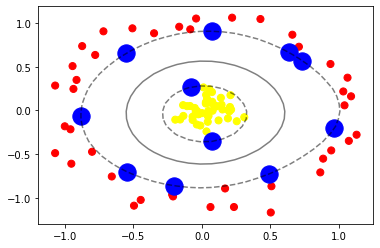

In [53]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn") #dibujamos los puntos
plt_svc(rbf) #aplicamos nuestra funcń de decisión, nos dibuja las lineas(continuas y discontinuas)
#plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue") #esto ya lo hace la funcion plt_svc()

## Ajustar los parámetros de SVM

In [62]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

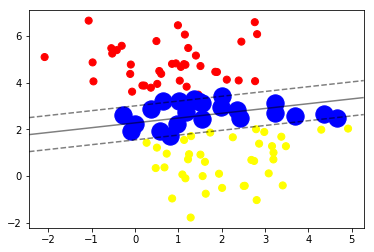

In [66]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

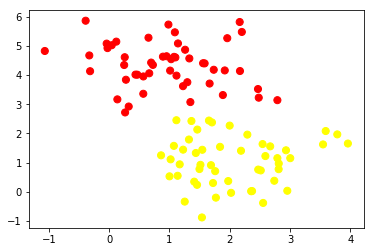

In [53]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

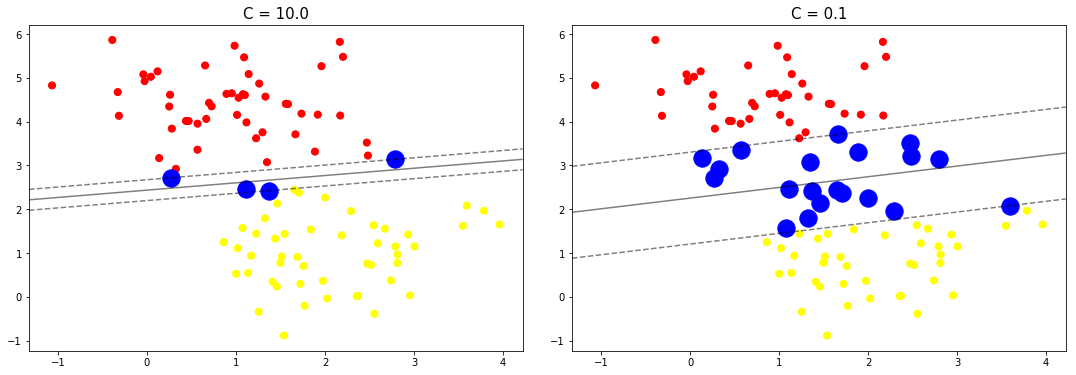

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1) #ajustamos los margenes

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)